In [3]:
import numpy as np 
import xarray as xr
import pandas as pd 
import datetime 
import seaborn as sns
import datetime as dt
from scipy.optimize import least_squares
import scipy

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits import mplot3d

%matplotlib inline
%config inlinebackend.figure_format='retina'

In [4]:
# load in both toga and awas data pickles 
utbl_allseg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/utbl_allseg_campavgbl.pkl")
tau_allseg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/tau_allseg_campavgbl.pkl")
seginfo_allseg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl/segment_info_campavgbl.pkl")
trcnames_allseg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/data_prep/trcnames_allseg.pkl")

toga_seg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/data_prep/toga_segments.pkl")
awas_seg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/data_prep/awas_segments.pkl")

awas_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/awas_data_df.pkl")
toga_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/toga_data_df.pkl")

In [60]:
# dibromomethane 
dibro_utbl = []

# 
col = list(trcnames_allseg)
for i in col:
    idx = np.where(trcnames_allseg[i] == 'Dibromomethane')
    utbl = utbl_allseg[i].loc[idx]
    if (len(utbl) > 0):
        dibro_utbl.append(np.float(utbl.values))

dibro_utbl = np.asarray(dibro_utbl)
dibro_utbl_gt = dibro_utbl[np.where(dibro_utbl > 1)]


Text(0, 0.5, 'Count')

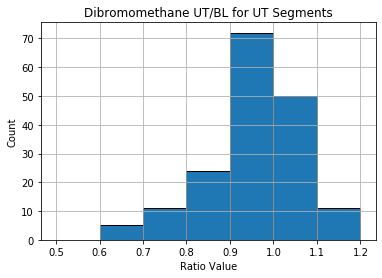

In [72]:
# all ratios 
bins = np.arange(0.5, 1.3, 0.1)

plt.hist(dibro_utbl, bins = bins, edgecolor = 'k')
plt.grid(which = 'major')
plt.title('Dibromomethane UT/BL for UT Segments')
plt.xlabel('Ratio Value')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

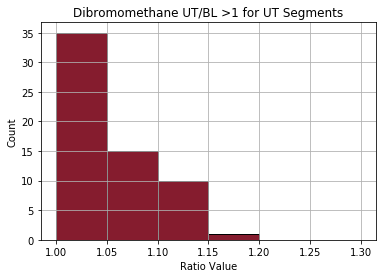

In [75]:
# >1 only 
bins = np.arange(1, 1.3, 0.05)

plt.hist(dibro_utbl_gt, facecolor = [0.52, 0.11, 0.18], edgecolor = 'k', bins = bins)
plt.grid(which = 'major')
plt.title('Dibromomethane UT/BL >1 for UT Segments')
plt.xlabel('Ratio Value')
plt.ylabel('Count')